In [1]:
#!pip freeze

In [14]:
%load_ext autoreload
%autoreload 2

#!pip install seaborn
#!pip install fiona
#!pip install pyshp
#!pip install geopandas
##!pip install dbfread
#!pip install simpledbf
#!pip install pymongo
#!pip install sqlalchemy
#!pip install sqlalchemy_utils
#!pip install pymysql
#!pip install pydotplus
#!pip install keras-adabound
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz

import fiona
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas as gpd
import datetime
#import pymongo
#from pymongo import MongoClient

#database imports
from sqlalchemy import create_engine
from sqlalchemy.types import Integer, Text, String, DateTime
from sqlalchemy_utils import database_exists, create_database
import pymysql
import mysql.connector

import tensorflow as tf
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from keras_adabound import AdaBound
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix


import pydot
import pydotplus
import graphviz
import pickle

from IPython.core.display import display, HTML
#from dbfread import DBF
#from simpledbf import Dbf5
import multiprocessing
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#movies.head()
from dataloader import hillsborough_county_rea_cd_encoded as hc_rea_cd_encoded
from SlimAutoencoderTest import SlimAutoencoderBuilder
from rea_cd_autoencoder import REA_CD_Autoencoder
#from keras_adabound import AdaBound

#from rea_cd_autoencoder import *
#from dataloader import hillsborough_county as hc

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
hc_rea_cd_encoded.load()

In [3]:
print(hc_rea_cd_encoded.sales_and_parcels.shape)
hc_rea_cd_encoded.sales_and_parcels.head()

(2111991, 65)


,PIN_x,FOLIO,DOR_CODE,NBHC_x,S_DATE_x,VI_x,QU,S_AMT_x,SUB_x,STR,S_TYPE,OR_BK,OR_PG,GRANTOR,GRANTEE,DOC_NUM,TYPE,PIN_y,DOR_C,OWNER,ADDR_1,ADDR_2,CITY,STATE,ZIP,COUNTRY,SUB_y,SITE_ADDR,SITE_CITY,SITE_ZIP,LEGAL1,LEGAL2,LEGAL3,LEGAL4,DBA,STRAP,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,TAXDIST,JUST,LAND,BLDG,EXF,ACT,EFF,HEAT_AR,ASD_VAL,TAX_VAL,MUNI,SD1,SD2,TIF,BASE,S_DATE_y,VI_y,S_AMT_y,ACREAGE,NBHC_y,Edit_dt,geometry,REA_CD_encoded_x,REA_CD_encoded_y
1369672,U-19-29-21-ZZZ-000004-07380.0,0855870200,0100,220005.0,1901-12-01,I,U,100.0,ZZZ,192921,DD,06468,0182,None,None,91259894,None,U-19-29-21-ZZZ-000004-07380.0,0100,136 N SAINT CLOUD LLC,4252 GREEN KEY RD,None,NEW PORT RICHEY,FL,34652-2074,None,ZZZ,136 SAINT CLOUD AVE,VALRICO,33594,BEG 25 FT W & 468.92 FT N OF SE COR OF SE 1/4 RUN,W 194 FT N 52 FT W 110 FT N 77 FT E 304 FT AND,S 131 FT TO POB,None,None,212919ZZZ000004073800U,6.0,4.0,3.0,3.0,3.0,U,230415.0,52131.0,159489.0,18795.0,1987.0,2003.0,2154.0,230415.0,230415.0,U,None,None,None,0.0,2001-10-26,I,84900.0,0.791903,220005.0,2019-03-21,"POLYGON ((579811.677 1310804.213, 579810.588 1...",4.368667,0.000000
1354557,U-35-28-21-ZZZ-000003-87990.0,0839190200,0200,221001.0,1902-02-01,V,U,22500.0,ZZZ,352821,WD,06498,1093,None,None,92017529,None,U-35-28-21-ZZZ-000003-87990.0,0200,JOSE A SANTIAGO ET AL,1412 WILKINSON DR,None,PLANT CITY,FL,33566-7917,None,ZZZ,1412 WILKINSON DR,PLANT CITY,33566,COMM SW COR OF E 3/4 OF NE 1/4 OF SW 1/4 THN E,25 FT THN N 157.16 FT FOR POB THN CON N 244.85 FT,THN N 88 DEG 54 MIN 39 SEC E 157.83 FTTHN S 20,DEG 34 MIN 03 SEC E 264.70 FT THN W 248.53 FT TO,None,212835ZZZ000003879900U,3.0,2.0,1.0,1.0,1.0,U,102408.0,37666.0,55398.0,9344.0,2000.0,2000.0,1296.0,63994.0,25000.0,U,None,None,None,1994.0,1993-07-01,I,22500.0,1.127820,221001.0,2019-02-25,"POLYGON ((597789.398 1332811.184, 597666.999 1...",0.000000,7.271828
2064848,T-15-28-19-54X-000009-00007.0,2007630187,0400,817029.0,1902-03-01,I,U,1000.0,54X,152819,CT,06560,1266,None,None,92065551,None,T-15-28-19-54X-000009-00007.0,0400,ARRIE ADEL POTTER,11334 STRATTON PARK DR,None,TAMPA,FL,33617-2392,None,54X,11334 STRATTON PARK DR,TEMPLE TERRACE,33617,VICTORIA TERRACE A CONDOMINIUM,PHASE 2,BLDG 9,UNIT 7,None,19281554X000009000070T,2.0,2.5,2.0,1.0,0.0,TT,113081.0,100.0,109779.0,3202.0,1984.0,2002.0,1200.0,57947.0,25000.0,T,702,None,E,1994.0,1992-10-01,I,50000.0,0.012098,217006.0,2021-03-30,"POLYGON ((529963.536 1351709.239, 529963.460 1...",4.368667,0.000000
2110431,P-20-28-22-5B7-000002-00005.0,2056440000,0100,221008.0,1903-05-01,I,U,100.0,5B7,202822,QC,06978,1229,None,None,93111152,None,P-20-28-22-5B7-000002-00005.0,0100,JAMES AND JAMIE HUDSON,1306 N FRANKLIN ST,None,PLANT CITY,FL,33563-2252,None,5B7,1306 N FRANKLIN ST,PLANT CITY,33563,OAK HILL,LOT 5 BLOCK 2,None,None,None,2228205B7000002000050P,3.0,1.0,1.0,1.0,1.0,PC,91701.0,24960.0,66741.0,0.0,1947.0,1998.0,988.0,91701.0,91701.0,P,None,None,None,0.0,2020-12-18,I,118000.0,0.137672,221008.0,2019-01-25,"POLYGON ((614449.668 1342443.275, 614323.167 1...",4.368667,0.000000
592814,U-33-28-19-1M2-000000-00006.3,0398100200,0000,218008.0,1904-11-01,V,U,100.0,1M2,332819,WD,04442,0588,None,None,None,None,U-33-28-19-1M2-000000-00006.3,0000,MYRNAMAE ENGLETON,6002 N 50TH ST APT A,None,TAMPA,FL,33610-3941,None,1M2,6002 N 50TH ST,TAMPA,33610,BENS SUBDIVISION,NORTH HALF OF LOT 6 LESS N 50 FT,None,None,None,1928331M2000000000063U,0.0,0.0,0.0,0.0,0.0,U,37620.0,37620.0,0.0,0.0,0.0,0.0,0.0,6197.0,6197.0,U,None,None,None,0.0,None,None,0.0,0.167876,218008.0,2019-03-18,"POLYGON ((526438.518 1333655.081, 526438.418 1...",0.000000,7.271828


In [4]:
builder = SlimAutoencoderBuilder(hc_rea_cd_encoded.sales_and_parcels)
test = builder.prepare()
print(test.shape)
test[:5]

(1354991, 14)


array([[4.14447730e-02, 6.17399410e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28967083e-04,
        0.00000000e+00, 1.35991013e-01],
       [9.99520216e-01, 3.79987469e-01, 2.95857988e-03, 8.82352941e-03,
        5.88235294e-03, 8.43170320e-04, 0.00000000e+00, 9.76744186e-01,
        9.88124691e-01, 3.06264174e-04, 9.99010880e-01, 5.42039399e-06,
        7.99954816e-02, 0.00000000e+00],
       [3.50768691e-02, 2.74454072e-01, 1.47928994e-02, 2.05882353e-02,
        5.88235294e-03, 8.43170320e-04, 5.91715976e-03, 9.80207818e-01,
        9.90103909e-01, 1.30238840e-03, 9.89614243e-01, 2.71989920e-04,
        0.00000000e+00, 4.57324143e-02],
       [3.18793685e-02, 2.90851022e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.29972537e-04,
        0.000

creating moding with input=14
output_branches: KerasTensor(type_spec=TensorSpec(shape=(None, 14), dtype=tf.float32, name=None), name='linear/BiasAdd:0', description="created by layer 'linear'")
Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 14)]              0         
_________________________________________________________________
encoder (Functional)         (None, 2)                 138       
_________________________________________________________________
decoder (Functional)         (None, 14)                156       
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________
Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 14)

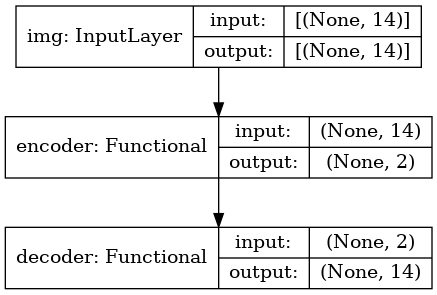

In [15]:
builder.createModel()
builder.model_autoencoder.summary()
tf.keras.utils.plot_model(builder.model_autoencoder, "SlimAutoencoderTrainTestBuilder.png", show_shapes=True)

In [7]:
!pip install pydotplus

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [13]:
!sudo apt-get update && apt-get install -y graphviz

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2320 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:6 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1428 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [560 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2755 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2202 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [593 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [34.4 kB]
Fetched 10.1 MB in 2s (5241 kB/s)                            
Reading 

In [18]:
builder.model_autoencoder.summary()
#tf.keras.utils.plot_model(builder.model_autoencoder, "autoencoder.png", show_shapes=True)
#tf.keras.utils.plot_model(builder.model_decoder, "decoder.png", show_shapes=True)
#tf.keras.utils.plot_model(builder.model_encoder, "encoder.png", show_shapes=True)# output shape:
# linear: 14
# S_TYPE_output: 35
# MUNI_output: 4
# TAXDIST_output: 4
# TIF_output: 15
# SITE_ZIP_output: 64
# VI_y_output: 2
# QU_output: 2

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 14)]              0         
_________________________________________________________________
encoder (Functional)         (None, 2)                 138       
_________________________________________________________________
decoder (Functional)         (None, 14)                156       
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoderinputs (InputLayer)   [(None, 14)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 18        
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


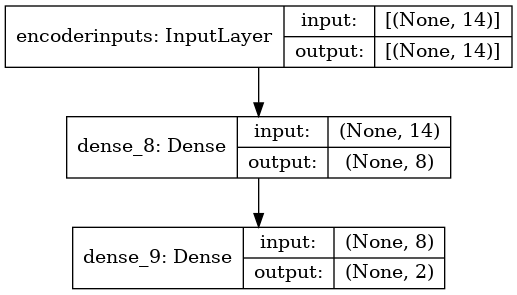

In [16]:
builder.model_encoder.summary()
tf.keras.utils.plot_model(builder.model_encoder, "SlimEncoder.png", show_shapes=True)

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoderinputs (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 24        
_________________________________________________________________
linear (Dense)               (None, 14)                126       
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


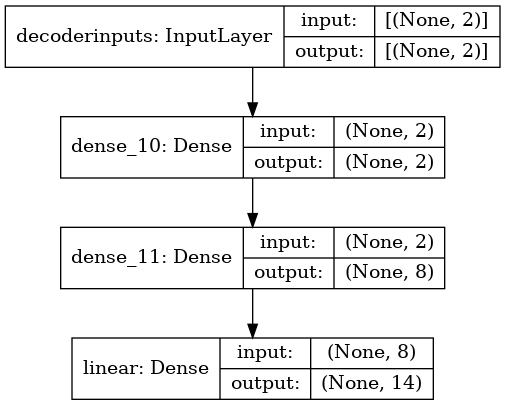

In [17]:
builder.model_decoder.summary()
tf.keras.utils.plot_model(builder.model_decoder, "SlimDecoder.png", show_shapes=True)

In [21]:
builder.df.shape

(1354991, 14)

In [22]:
#builder.model_autoencoder = tf.keras.models.load_model('../models/encoders/SlimAutoencoder2')
#builder.model_decoder = tf.keras.models.load_model('../models/encoders/SlimDecoder2')
#builder.model_encoder = tf.keras.models.load_model('../models/encoders/SlimEncoder2')

In [23]:
loss = [tf.keras.losses.MeanSquaredError(), tf.keras.losses.CategoricalCrossentropy(), tf.keras.losses.CategoricalCrossentropy(),
                      tf.keras.losses.CategoricalCrossentropy(), tf.keras.losses.CategoricalCrossentropy(),
                       tf.keras.losses.CategoricalCrossentropy(),
                       tf.keras.losses.CategoricalCrossentropy(),
                       tf.keras.losses.CategoricalCrossentropy()
                      ]
print(f"len(loss)={len(loss)}")
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True, mode='auto')
builder.model_autoencoder.compile(
            optimizer = tf.keras.optimizers.Adam(1e-5), #RMSprop(1e-4), #tf.keras.optimizers.Adam(1e-5), #adam, tf.keras.optimizers.RMSprop(1e-3)
            loss=loss,
            metrics=['mse'] #,tf.keras.metrics.Recall(),tf.keras.metrics.Precision()]
            #,metrics= self.getMetrics()
        )


len(loss)=8


In [24]:
#earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True, mode='auto')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=3)
builder.history = builder.model_autoencoder.fit(
    builder.df, 
    builder.df, 
    validation_split=.1,
    batch_size=128,
    epochs=100,
    callbacks=[earlystop_callback, reduce_lr], 
    verbose=1
)
#RMSProp(1e-4)
#MinMaxScaler = 0.0167
#StandardScaler = 0.421

Epoch 1/100
9528/9528 [==============================] - 5s 516us/step - loss: 0.2075 - mse: 0.2075 - val_loss: 0.1439 - val_mse: 0.1439
Epoch 2/100
9528/9528 [==============================] - 5s 507us/step - loss: 0.1072 - mse: 0.1072 - val_loss: 0.0697 - val_mse: 0.0697
Epoch 3/100
9528/9528 [==============================] - 5s 511us/step - loss: 0.0539 - mse: 0.0539 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 4/100
9528/9528 [==============================] - 5s 508us/step - loss: 0.0422 - mse: 0.0422 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 5/100
9528/9528 [==============================] - 5s 509us/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 6/100
9528/9528 [==============================] - 5s 513us/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 7/100
9528/9528 [==============================] - 5s 515us/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 8/100
9528/9528 [==================

In [25]:
holdout = builder.model_autoencoder.evaluate(builder.df_test_scaled, builder.df_test_scaled)
holdout

4235/4235 [==============================] - 2s 355us/step - loss: 0.0080 - mse: 0.0080


[0.007966069504618645, 0.007966069504618645]

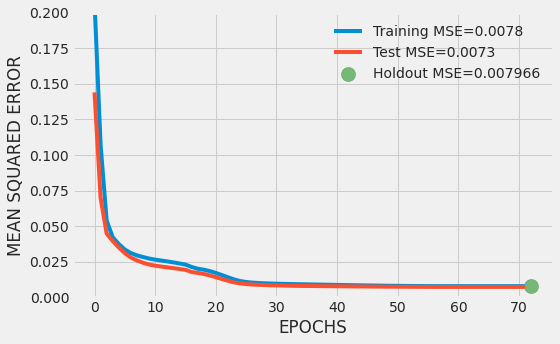

In [49]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
plt.style.use('seaborn-white')
plt.style.use('fivethirtyeight')
ax.set_ylabel('MEAN SQUARED ERROR')
ax.set_xlabel('EPOCHS')
ax.set_ylim(0,.2)
ax.scatter(x=[72],y=[0.007966],color='green',label='Holdout MSE=0.007966',s=200,alpha=.5)
ax.plot(builder.history.history['mse'],label='Training MSE=0.0078')
ax.plot(builder.history.history['val_mse'],label='Test MSE=0.0073')

ax.legend()
plt.tight_layout()
plt.savefig('slimautoencoder3_results.png')

In [30]:
builder.model_autoencoder.save("../models/encoders/SlimAutoencoder2021-09-09b")

INFO:tensorflow:Assets written to: ../models/encoders/SlimAutoencoder2021-09-09b/assets


In [31]:
builder.model_encoder.save("../models/encoders/SlimEncoder2021-09-09b")

INFO:tensorflow:Assets written to: ../models/encoders/SlimEncoder2021-09-09b/assets


In [32]:
builder.model_decoder.save("../models/encoders/SlimDecoder2021-09-09b")

INFO:tensorflow:Assets written to: ../models/encoders/SlimDecoder2021-09-09b/assets


In [6]:
builder.model_autoencoder = tf.keras.models.load_model('../models/encoders/SlimAutoencoder2021-09-09')
builder.model_decoder = tf.keras.models.load_model('../models/encoders/SlimDecoder2021-09-09')
builder.model_encoder = tf.keras.models.load_model('../models/encoders/SlimEncoder2021-09-09')

In [33]:
encodings = builder.model_encoder.predict(builder.df)
encodings.shape

(1354991, 2)

In [34]:
builder.autoencoded = pd.DataFrame(data={'Dates':builder.dates.copy(),'encoded_x':encodings[:,0], 'encoded_y':encodings[:,1]})
builder.autoencoded.shape

(1354991, 3)

In [35]:
builder.autoencoded.head()

,Dates,encoded_x,encoded_y
774332,2000-01-28,2.280181,0.062318
784365,2000-01-28,10.022599,5.666726
1394453,2000-01-28,6.172746,4.738334
1505303,2000-01-28,2.157917,0.065706
96990,2000-01-28,6.285429,4.859788


In [36]:
builder.autoencoded[-2:]
builder.autoencoded_scaler = StandardScaler()
builder.autoencoded_scaler.fit(builder.autoencoded.iloc[:,1:])
builder.autoencoded_scaled = builder.autoencoded_scaler.transform(builder.autoencoded.iloc[:,1:])
builder.autoencoded_scaled.shape
builder.autoencoded_scaled = pd.DataFrame({'Dates': builder.autoencoded['Dates'], 
                                           'encoded_x': builder.autoencoded_scaled[:,0], 
                                           'encoded_y': builder.autoencoded_scaled[:,1]})
builder.autoencoded_scaled['Dates'] = pd.to_datetime(builder.autoencoded_scaled['Dates'])
builder.autoencoded_scaled.head()

,Dates,encoded_x,encoded_y
774332,2000-01-28,-1.456276,-1.316680
784365,2000-01-28,1.706479,1.100576
1394453,2000-01-28,0.133826,0.700148
1505303,2000-01-28,-1.506220,-1.315219
96990,2000-01-28,0.179856,0.752532


In [72]:
!pip install imageio

     |████████████████████████████████| 3.3 MB 2.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [75]:
%%time
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import math
import imageio

savepath = '../img/one_channel/'
skipweekends = True
start_date = datetime.date(2000, 1, 28)
end_date = datetime.date(2021, 8, 11)
delta = datetime.timedelta(days=1)

num_intervals = 0
found_rows = None
progress = 0
minimum = np.vstack([builder.autoencoded_scaled.iloc[:,1],builder.autoencoded_scaled.iloc[:,2]]).min()
maximum = np.vstack([builder.autoencoded_scaled.iloc[:,1],builder.autoencoded_scaled.iloc[:,2]]).max()
if minimum**2 > maximum**2:
    maximum = minimum * -1
else:
    minimum = maximum * -1
print(minimum)
print(maximum)
#print(minimum,maximum)
df = builder.autoencoded_scaled
#print(df.columns)
while start_date <= end_date:
    
    #print(start_date)
    start_date += delta
    current_date = start_date
    next_date = start_date + delta
    
    
    if skipweekends & start_date.weekday() >= 5:
        continue
    
    mask = (df['Dates'] >= str(current_date)) & (df['Dates'] < str(next_date))

    found_rows = builder.autoencoded_scaled.loc[ mask ]
    with plt.style.context('dark_background'):
        fig, ax = plt.subplots(1,1,figsize=(1.4,1.4)) #2.78 is 200 pixels
        canvas = FigureCanvas(fig)
        #for item in [fig, ax]:
        #    item.patch.set_visible(False)
        ax.axis('off')
        #plt.imshow(data, interpolation='nearest')
        #ax.set_title(f"{current_date} to {next_date} {found_rows.shape}")
        ax.set_ylim(minimum, maximum)
        ax.set_xlim(minimum, maximum)
        #ax.set_ylim(-1.25,-.4)
        #ax.set_xlim(0,1.6)
        ax.scatter(x=found_rows['encoded_x'],y=found_rows['encoded_y'], alpha=0.1, c='w')
        canvas.draw()       # draw the canvas, cache the renderer
        #image = np.fromstring(canvas.tostring_rgb(), dtype='uint8')
        image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
        reshaped = image.reshape(100,100,-1)
        one_channel = reshaped[:,:,2]
        #plt.imsave(f'{savepath}{start_date}.png',one_channel)
        imageio.imwrite(f'{savepath}{start_date}.png', one_channel)
        #img = Image.fromarray(one_channel)
        #img.save(f'{savepath}{start_date}.png')
        plt.close(fig)
        
        #plt.show()
        #plt.savefig(f'{savepath}{start_date}.png')
        #plt.close(fig)
    #df.plot(ax=ax,figsize=(5,5),color='black')
    num_intervals += 1

    #saveSalesOnDayAsImage(found_rows, str(current_date))
    #num_intervals += 1
print("done")
shape = image.shape[0]
shape = shape /3
dimension = math.sqrt(shape)
print(f"dimension: {dimension}") #{}

-3.057098388671875
3.0570984
done
dimension: 100.0
CPU times: user 3min 3s, sys: 1.68 s, total: 3min 4s
Wall time: 3min 4s


In [56]:
reshaped = image.reshape(100,100,-1)
reshaped.shape

(100, 100, 3)

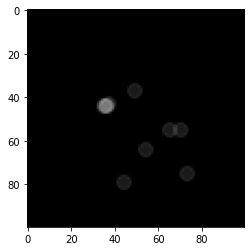

In [57]:
plt.imshow(reshaped)

(100, 100)


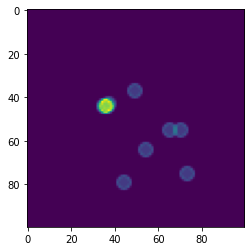

In [62]:
one_channel = reshaped[:,:,2]
print(one_channel.shape)
plt.imshow(one_channel)

In [63]:
plt.imsave('test_single_channel.png',one_channel)

In [11]:
builder.autoencoded_scaled.describe()

,encoded_x,encoded_y
count,1.354991e+06,1354991.0
mean,2.522503e-08,0.0
std,1.000000e+00,0.0
min,-1.453027e+00,0.0
25%,-9.123674e-01,0.0
50%,8.082160e-01,0.0
75%,9.016210e-01,0.0
max,1.322589e+00,0.0


In [71]:
import cv2
import os

image_folder = '../img/zoomed'
video_name = 'video_15fps.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 15, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [37]:
builder.df_prepared.head()

,NBHC_x,STR,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,ACT,EFF,HEAT_AR,BASE,ACREAGE,REA_CD_encoded_x,REA_CD_encoded_y
1029947,822050.0,-24760,1.0,1.0,1.0,1.0,0.0,2003.0,2011.0,740.0,2011.0,0.000053,0.000000,53.472858
1905590,204006.0,-18154,4.0,2.5,2.0,1.0,1.0,2018.0,2019.0,2445.0,0.0,0.248471,54.611423,0.000000
874755,816017.0,-23888,3.0,2.0,1.0,1.0,0.0,1992.0,2006.0,1274.0,2020.0,0.034433,0.000000,21.272528
105207,210004.0,6209,4.0,4.0,2.0,1.0,1.0,2003.0,2011.0,3947.0,0.0,0.208724,0.000000,21.272528
1111997,224005.0,-18052,3.0,2.0,1.0,1.0,1.0,1986.0,2003.0,2007.0,1994.0,0.736534,0.000000,53.472858


In [38]:
builder.df_verification = builder.df_prepared.copy()

In [39]:
builder.df_original.head()

,PIN_x,FOLIO,DOR_CODE,NBHC_x,S_DATE_x,VI_x,QU,S_AMT_x,SUB_x,STR,S_TYPE,OR_BK,OR_PG,GRANTOR,GRANTEE,DOC_NUM,TYPE,PIN_y,DOR_C,OWNER,ADDR_1,ADDR_2,CITY,STATE,ZIP,COUNTRY,SUB_y,SITE_ADDR,SITE_CITY,SITE_ZIP,LEGAL1,LEGAL2,LEGAL3,LEGAL4,DBA,STRAP,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,TAXDIST,JUST,LAND,BLDG,EXF,ACT,EFF,HEAT_AR,ASD_VAL,TAX_VAL,MUNI,SD1,SD2,TIF,BASE,S_DATE_y,VI_y,S_AMT_y,ACREAGE,NBHC_y,Edit_dt,geometry,REA_CD_encoded_x,REA_CD_encoded_y
774332,U-07-32-19-1V9-000000-01061.0,0565480000,0000,227002.0,2000-01-28,I,U,84200.0,1V9,073219,WD,10031,0768,BRENNEMAN DALE,DEFAY PAUL T JR,2000028597,None,U-07-32-19-1V9-000000-01061.0,0000,RODNEY E DUE AND SONIA A ESLIT,PO BOX 8202,None,SEMINOLE,FL,33775-8202,None,1V9,0,RUSKIN,33570,GORE'S ADDITION TO RUSKIN FLORIDA,LOT 1061,None,None,None,1932071V9000000010610U,0.0,0.0,0.0,0.0,0.0,U,31716.0,31716.0,0.0,0.0,0.0,0.0,0.0,31716.0,31716.0,U,None,None,None,0.0,None,None,0.0,0.397661,227002.0,2018-12-31,"POLYGON ((511575.927 1227618.900, 511572.397 1...",0.000000,7.271828
784365,U-12-32-19-1WZ-000058-00000.0,0568202220,0400,828065.0,2000-01-28,I,U,27500.0,1WZ,123219,TR,10029,1998,VETTE CORRIENE TRUSTEE,HARDMAN ROBERT H,2000027509,None,U-12-32-19-1WZ-000058-00000.0,0400,HENRY CHARLES AND CELESTE A VOGEL,302 CANTON CT UNIT 58,None,SUN CITY CENTER,FL,33573-5626,None,1WZ,302 CANTON CT 58,SUN CITY CENTER,33573,CAMBRIDGE C CONDOMINIUM,BUILDING NO 58,UNIT TYPE A,3.78 PERCENTAGE OF COMMON ELEMENTS,None,1932121WZ000058000000U,1.0,1.5,1.0,1.0,0.0,U,55952.0,100.0,54210.0,1642.0,1974.0,1997.0,800.0,27317.0,2317.0,U,None,None,None,2020.0,2019-02-28,I,67500.0,0.016733,228003.0,2019-02-18,"POLYGON ((537244.187 1226681.476, 537238.527 1...",4.368667,0.000000
1394453,U-31-29-21-33O-000000-00010.0,0866925020,0100,223007.0,2000-01-28,I,Q,251500.0,33O,312921,WD,10041,1784,PLACE ROBERT L,BARGER GAITHEL A,2000035854,None,U-31-29-21-33O-000000-00010.0,0100,GAITHEL A BARGER AND BARBARA J FISHER/ TRUSTEES,2202 WINDWOOD PL,None,VALRICO,FL,33596-5249,None,33O,2202 WINDWOOD PL,VALRICO,33596,WINDWOOD HILLS,LOT 10,None,None,None,21293133O000000000100U,5.0,3.5,1.0,1.0,1.0,U,388983.0,134168.0,223331.0,31484.0,1981.0,2001.0,3402.0,230636.0,180636.0,U,None,None,None,2001.0,2000-01-28,I,251500.0,0.838639,223007.0,2020-03-03,"POLYGON ((574734.714 1299958.394, 574721.330 1...",0.000000,2.445443
1505303,U-18-29-22-ZZZ-000004-99520.0,0923850050,0000,221001.0,2000-01-28,I,Q,85000.0,ZZZ,182922,WD,10058,0959,MCCARTHY JOHN O,MM & A CONSTRUCTION OF FLORIDA,2000047905,None,U-18-29-22-ZZZ-000004-99520.0,0000,MARCO ANTONIO HERNANDEZ-TREJO ET AL,3392 ROYAL OAK DR N,None,MULBERRY,FL,33860-9471,None,ZZZ,3608 DRAWDY RD,PLANT CITY,33567,W 1/2 OF W 1/2 OF NW 1/4 OF NW 1/4 LESS S 710....,AND LESS N 210 FT AND LESS S 130 FT OF N 340 F...,W 150 FT AND LESS RD R/W,None,None,222918ZZZ000004995200U,0.0,0.0,0.0,0.0,0.0,U,80328.0,79328.0,0.0,1000.0,0.0,0.0,0.0,80328.0,80328.0,U,None,None,None,0.0,2008-03-21,V,130000.0,2.559050,221001.0,2019-02-27,"POLYGON ((606849.791 1320102.632, 606728.780 1...",0.000000,2.445443
96990,U-21-28-17-05Z-000010-00004.0,0040393930,0100,210004.0,2000-01-28,V,U,134300.0,05Z,212817,WD,10035,1261,WESTBROOK WESTCHASE L P,RYLAND GROUP INC,2000031302,None,U-21-28-17-05Z-000010-00004.0,0100,ROBERT J AND CHRISTINE D VICTOR,10438 GREENDALE DR,None,TAMPA,FL,33626-5304,None,05Z,10438 GREENDALE DR,TAMPA,33626,WESTCHASE SECTION 306B,LOT 4 BLOCK 10,None,None,None,17282105Z000010000040U,4.0,3.0,2.0,1.0,1.0,U,505831.0,92902.0,378372.0,34557.0,2000.0,2014.0,2902.0,441376.0,391376.0,U,037,None,None,2017.0,2016-06-10,I,530000.0,0.165285,210004.0,2019-04-05,"POLYGON ((458399.158 1347881.367, 458397.319 1...",0.000000,7.271828


In [40]:
rea_cd_autoencoder = REA_CD_Autoencoder('../models/encoders/')

In [41]:
builder.df_verification['encoded_x'] = builder.autoencoded_scaled['encoded_x']
builder.df_verification['encoded_y'] = builder.autoencoded_scaled['encoded_y']
builder.df_verification['Date'] = builder.dates
builder.df_verification.head()

,NBHC_x,STR,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,ACT,EFF,HEAT_AR,BASE,ACREAGE,REA_CD_encoded_x,REA_CD_encoded_y,encoded_x,encoded_y,Date
1029947,822050.0,-24760,1.0,1.0,1.0,1.0,0.0,2003.0,2011.0,740.0,2011.0,0.000053,0.000000,53.472858,2.691211,1.640238,2020-09-29
1905590,204006.0,-18154,4.0,2.5,2.0,1.0,1.0,2018.0,2019.0,2445.0,0.0,0.248471,54.611423,0.000000,-1.799258,-1.193789,2013-12-19
874755,816017.0,-23888,3.0,2.0,1.0,1.0,0.0,1992.0,2006.0,1274.0,2020.0,0.034433,0.000000,21.272528,2.115584,1.325891,2013-11-19
105207,210004.0,6209,4.0,4.0,2.0,1.0,1.0,2003.0,2011.0,3947.0,0.0,0.208724,0.000000,21.272528,-1.099036,-1.129279,2017-04-27
1111997,224005.0,-18052,3.0,2.0,1.0,1.0,1.0,1986.0,2003.0,2007.0,1994.0,0.736534,0.000000,53.472858,1.021472,1.193877,2013-11-08


In [42]:
verification_df = rea_cd_autoencoder.decode_rea_cd_in_df( builder.df_verification )
verification_df.shape

(1219491, 16)

In [43]:
verification_df.head()

,NBHC_x,STR,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,ACT,EFF,HEAT_AR,BASE,ACREAGE,encoded_x,encoded_y,Date,REA_CD
1029947,822050.0,-24760,1.0,1.0,1.0,1.0,0.0,2003.0,2011.0,740.0,2011.0,0.000053,2.691211,1.640238,2020-09-29,11
1905590,204006.0,-18154,4.0,2.5,2.0,1.0,1.0,2018.0,2019.0,2445.0,0.0,0.248471,-1.799258,-1.193789,2013-12-19,3C
874755,816017.0,-23888,3.0,2.0,1.0,1.0,0.0,1992.0,2006.0,1274.0,2020.0,0.034433,2.115584,1.325891,2013-11-19,02
105207,210004.0,6209,4.0,4.0,2.0,1.0,1.0,2003.0,2011.0,3947.0,0.0,0.208724,-1.099036,-1.129279,2017-04-27,02
1111997,224005.0,-18052,3.0,2.0,1.0,1.0,1.0,1986.0,2003.0,2007.0,1994.0,0.736534,1.021472,1.193877,2013-11-08,11


In [58]:
# Connect to mysql via sqlAlchemy
engine = create_engine('mysql+pymysql://root:datascience@db/stargazer', echo=True)
if not database_exists(engine.url):
    create_database(engine.url)
dbConnection = engine.connect

In [59]:
def store_df_in_db(df, database_name, table_name):
    engine = create_engine('mysql+pymysql://root:datascience@db/'+database_name, echo=True)
    if not database_exists(engine.url):
        create_database(engine.url)
    dbConnection = engine.connect
    df.to_sql(table_name, con=engine, if_exists='replace')

In [60]:
store_df_in_db( verification_df, 'stargazer', 'hills_encoded2' )

2021-09-09 23:44:11,718 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-09-09 23:44:11,719 INFO sqlalchemy.engine.Engine [raw sql] {}
2021-09-09 23:44:11,720 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-09-09 23:44:11,721 INFO sqlalchemy.engine.Engine [generated in 0.00036s] {}
2021-09-09 23:44:11,722 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2021-09-09 23:44:11,722 INFO sqlalchemy.engine.Engine [raw sql] {}
2021-09-09 23:44:11,724 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2021-09-09 23:44:11,724 INFO sqlalchemy.engine.Engine [generated in 0.00036s] {'table_schema': 'stargazer', 'table_name': 'hills_encoded2'}
2021-09-09 23:44:11,726 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2021-09-09 23:44:11,726 INFO sqlalchemy.engine.

In [61]:
def dfQuery(query):
    cnx = mysql.connector.connect(
        host="db",
        port=3306,
        user="root",
        password="datascience",
        db='stargazer')
    cur = cnx.cursor()

    # Execute a query
    cur.execute(query)

    # Fetch one result
    result = cur.fetchall()
    field_names = [ i [0] for i in cur.description ]
    df = pd.DataFrame( result, columns=field_names)
    
    cnx.close()
    return df
def query(query):
    cnx = mysql.connector.connect(
        host="db",
        port=3306,
        user="root",
        password="datascience")
    cur = cnx.cursor()

    # Execute a query
    cur.execute(query)

    # Fetch one result
    result = cur.fetchall()
    
    cnx.close()
    return result
    

In [62]:
dfQuery("show tables")

,Tables_in_stargazer
0,hills_encoded
1,hills_encoded2
